# Project: How much does it cost to stay in a hotel room in Seattle using Airbnb?

# Part 1: Business Understanding

#### Q1. During which months or seasons is it generally cheapest to book a hotel room in Seattle on Airbnb?
#### Q2. What is the typical price range for hotel room listings on Airbnb in Seattle, and how does it vary by location within the city?
#### Q3. What specific factors or amenities (such as room size, view, or proximity to attractions) tend to influence the price of hotel rooms on Airbnb in Seattle?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline


def clean_price_columns(df, columns):
    """
    This function removes dollar signs ($) and commas (,) from specified columns
    and converts the values to float.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the columns to clean.
    columns (list): A list of column names where the dollar signs and commas 
                    will be removed, and the values will be converted to floats.

    Returns:
    pd.DataFrame: The DataFrame with cleaned columns.
    """
    # Loop through each column in the provided list
    for column in columns:
        # Replace dollar signs and commas with empty strings and convert to float
        df[column] = df[column].replace({r'\$': '', ',': ''}, regex=True).astype(float)
    
    return df


# Part 2: Data Cleaning

### 1. Gather

In [2]:
df_calendar = pd.read_csv('Seattle_Airbnb_Open_Data/calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
df_calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

* Need to convert data column to datetime format
* Need to convert price column to float format

In [4]:
df_reviews = pd.read_csv('Seattle_Airbnb_Open_Data/reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


This data does not contain rank or rating columns, making it difficult to assess or analyze the data directly. Since the file only includes text-based reviews, a different type of model, such as a natural language processing (NLP) model, would be required to classify and analyze these text reviews, instead of relying on structured data like ratings or rankings.

In [5]:
df_listing = pd.read_csv('Seattle_Airbnb_Open_Data/listings.csv')
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
# Show data of first 20 columns
df_listing.iloc[:, :20].head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,https://a2.muscache.com/ac/pictures/b4324e0f-a...,NaN,16708587,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/ac/pictures/94146944/6...,NaN,9851441,https://www.airbnb.com/users/show/9851441,Emily,2013-11-06
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,NaN,NaN,https://a1.muscache.com/ac/pictures/6120468/b0...,NaN,1452570,https://www.airbnb.com/users/show/1452570,Emily,2011-11-29


In [7]:
# Display data of next 20 columns
df_listing.iloc[:, 20:40].head()

,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state
0,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA
1,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA
2,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,f,https://a1.muscache.com/ac/users/16708587/prof...,https://a1.muscache.com/ac/users/16708587/prof...,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA
3,"Seattle, Washington, United States",NaN,NaN,NaN,NaN,f,https://a2.muscache.com/ac/users/9851441/profi...,https://a2.muscache.com/ac/users/9851441/profi...,Queen Anne,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA
4,"Seattle, Washington, United States","Hi, I live in Seattle, Washington but I'm orig...",within an hour,100%,NaN,f,https://a0.muscache.com/ac/users/1452570/profi...,https://a0.muscache.com/ac/users/1452570/profi...,Queen Anne,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA


In [8]:
# Display data of next 20 columns
df_listing.iloc[:, 40:60].head()

,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price
0,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN
1,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00"
2,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$975.00,NaN,NaN
3,98119,Seattle,"Seattle, WA",US,United States,47.638473,-122.369279,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,$100.00,$650.00,"$2,300.00"
4,98119,Seattle,"Seattle, WA",US,United States,47.632918,-122.372471,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,$450.00,NaN,NaN


In [9]:
# Display data of next 20 columns
df_listing.iloc[:, 60:80].head()

,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin
0,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0
1,$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0
2,"$1,000.00",$300.00,10,$25.00,4,30,5 weeks ago,t,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0
3,NaN,NaN,1,$0.00,1,1125,6 months ago,t,0,0,0,143,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN
4,$700.00,$125.00,6,$15.00,1,1125,7 weeks ago,t,30,60,90,365,2016-01-04,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0


In [10]:
# Display data of next 20 columns
df_listing.iloc[:, 80:].head()

,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,NaN,NaN,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,10.0,9.0,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


There are too many columns, so consider keeping only the columns needed for analysis.

In [11]:
df_listing.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

In [12]:
# The columns of df_reviews and df_calendar are few so they are clearly shown without needing to be shown.
df_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

### 2. Clear missing data

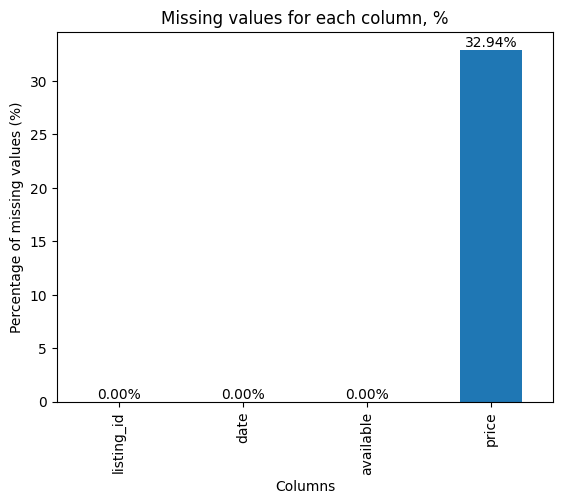

In [13]:
df_calendar_missing = df_calendar.isnull().mean() * 100

# Create a bar plot for missing values
ax = df_calendar_missing.plot(kind="bar")
plt.title("Missing values for each column, %")
plt.xlabel("Columns")
plt.ylabel("Percentage of missing values (%)")

# Add data labels to each bar
for i in range(len(df_calendar_missing)):
    ax.text(i, df_calendar_missing.iloc[i], f"{df_calendar_missing.iloc[i]:.2f}%", ha='center', va='bottom')

plt.show()

Since only about 33% is missing, we will delete the missing value of PRICE.
(We have determined that about 67% of the data is enough.)

In [14]:
df_calendar = df_calendar.dropna(subset=['price'])

# Change 'time' column to datetime
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
df_calendar['year'] = pd.to_datetime(df_calendar['date']).dt.strftime("%y")
df_calendar['month'] = pd.to_datetime(df_calendar['date']).dt.strftime("%m")
df_calendar['year'] = df_calendar['year'].astype(int)
df_calendar['month'] = df_calendar['month'].astype(int)

# Sort dataframe by 'time' column from smallest to largest
df_calendar = df_calendar.sort_values(by='date', ascending=True)

# Use the function to clean columns in the df_calendar DataFrame
df_calendar = clean_price_columns(df_calendar, ['price'])

# Drop available column because string value
df_calendar = df_calendar.drop('available', axis=1)
df_calendar

,listing_id,date,price,year,month
0,241032,2016-01-04,85.0,16,1
829645,7922663,2016-01-04,49.0,16,1
829280,9063355,2016-01-04,50.0,16,1
828550,2016613,2016-01-04,300.0,16,1
827820,788146,2016-01-04,58.0,16,1
...,...,...,...,...,...
74094,7381677,2017-01-02,199.0,17,1
784749,6482409,2017-01-02,105.0,17,1
1094,3308979,2017-01-02,975.0,17,1
776719,2197168,2017-01-02,135.0,17,1


In [15]:
print(df_calendar['date'].min())
print(df_calendar['date'].max())

2016-01-04 00:00:00
2017-01-02 00:00:00


In [16]:
# Count the number of data belonging to 2016 and 2017
df_calendar_2016 = df_calendar[df_calendar['year'] == 16]  # 2016
df_calendar_2017 = df_calendar[df_calendar['year'] == 17]  # 2017

count_2016 = len(df_calendar_2016)
count_2017 = len(df_calendar_2017)

print(f"Number of data in year 2016: {count_2016}")
print(f"Number of data in year 2017: {count_2017}")


Number of data in year 2016: 928844
Number of data in year 2017: 5698


Only a few days of 2017 data are included, so remove 2017 data and use only 2016 data.

In [17]:
# Drop year column because it is no longer valid
df_calendar_2016 = df_calendar_2016.drop('year', axis=1)

In [18]:
df_calendar_2016.isnull().sum()

listing_id    0
date          0
price         0
month         0
dtype: int64

Select columns that are potentially useful to use in analysis to find answers to the questions that have been asked.

In [19]:
cols = [
'price', 'extra_people', 'security_deposit', 'cleaning_fee', 'minimum_nights', 'maximum_nights', 'accommodates', 'bedrooms', 'bathrooms', 'beds', 'bed_type', 'property_type', 'room_type'
]

In [20]:
new_df_listing = df_listing[cols]
new_df_listing.iloc[:, :20].head()

,price,extra_people,security_deposit,cleaning_fee,minimum_nights,maximum_nights,accommodates,bedrooms,bathrooms,beds,bed_type,property_type,room_type
0,$85.00,$5.00,NaN,NaN,1,365,4,1.0,1.0,1.0,Real Bed,Apartment,Entire home/apt
1,$150.00,$0.00,$100.00,$40.00,2,90,4,1.0,1.0,1.0,Real Bed,Apartment,Entire home/apt
2,$975.00,$25.00,"$1,000.00",$300.00,4,30,11,5.0,4.5,7.0,Real Bed,House,Entire home/apt
3,$100.00,$0.00,NaN,NaN,1,1125,3,0.0,1.0,2.0,Real Bed,Apartment,Entire home/apt
4,$450.00,$15.00,$700.00,$125.00,1,1125,6,3.0,2.0,3.0,Real Bed,House,Entire home/apt


In [21]:
new_df_listing.dtypes

price                object
extra_people         object
security_deposit     object
cleaning_fee         object
minimum_nights        int64
maximum_nights        int64
accommodates          int64
bedrooms            float64
bathrooms           float64
beds                float64
bed_type             object
property_type        object
room_type            object
dtype: object

In [22]:
# Use the function to clean multiple columns in the new_df_listing DataFrame
new_df_listing = clean_price_columns(new_df_listing, ['price', 'extra_people', 'security_deposit', 'cleaning_fee'])

new_df_listing.iloc[:, :20].head()

C:\Users\hoida\AppData\Local\Temp\ipykernel_20948\1721393503.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].replace({r'\$': '', ',': ''}, regex=True).astype(float)
C:\Users\hoida\AppData\Local\Temp\ipykernel_20948\1721393503.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].replace({r'\$': '', ',': ''}, regex=True).astype(float)
C:\Users\hoida\AppData\Local\Temp\ipykernel_20948\1721393503.py:29: SettingWithCopyWarning: 
A value is trying to be set on 

,price,extra_people,security_deposit,cleaning_fee,minimum_nights,maximum_nights,accommodates,bedrooms,bathrooms,beds,bed_type,property_type,room_type
0,85.0,5.0,NaN,NaN,1,365,4,1.0,1.0,1.0,Real Bed,Apartment,Entire home/apt
1,150.0,0.0,100.0,40.0,2,90,4,1.0,1.0,1.0,Real Bed,Apartment,Entire home/apt
2,975.0,25.0,1000.0,300.0,4,30,11,5.0,4.5,7.0,Real Bed,House,Entire home/apt
3,100.0,0.0,NaN,NaN,1,1125,3,0.0,1.0,2.0,Real Bed,Apartment,Entire home/apt
4,450.0,15.0,700.0,125.0,1,1125,6,3.0,2.0,3.0,Real Bed,House,Entire home/apt


Text(0.5, 1.0, 'Missing values \u200b\u200bfor each columns, %')

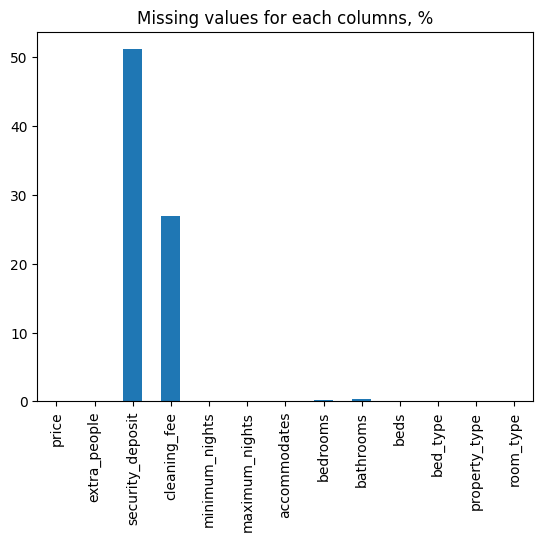

In [23]:
df_listings_missing = new_df_listing.isnull().mean() *100
df_listings_missing.plot(kind="bar")
plt.title("Missing values ​​for each columns, %")

In [24]:
new_df_listing.isnull().sum()

price                  0
extra_people           0
security_deposit    1952
cleaning_fee        1030
minimum_nights         0
maximum_nights         0
accommodates           0
bedrooms               6
bathrooms             16
beds                   1
bed_type               0
property_type          1
room_type              0
dtype: int64

The number of missing values ​​in the security_deposit column is quite large, so we remove it from the columns to consider.

In [25]:
# Drop available column because string value
new_df_listing = new_df_listing.drop('security_deposit', axis=1)
new_df_listing

,price,extra_people,cleaning_fee,minimum_nights,maximum_nights,accommodates,bedrooms,bathrooms,beds,bed_type,property_type,room_type
0,85.0,5.0,NaN,1,365,4,1.0,1.0,1.0,Real Bed,Apartment,Entire home/apt
1,150.0,0.0,40.0,2,90,4,1.0,1.0,1.0,Real Bed,Apartment,Entire home/apt
2,975.0,25.0,300.0,4,30,11,5.0,4.5,7.0,Real Bed,House,Entire home/apt
3,100.0,0.0,NaN,1,1125,3,0.0,1.0,2.0,Real Bed,Apartment,Entire home/apt
4,450.0,15.0,125.0,1,1125,6,3.0,2.0,3.0,Real Bed,House,Entire home/apt
...,...,...,...,...,...,...,...,...,...,...,...,...
3813,359.0,0.0,230.0,3,1125,6,3.0,2.0,3.0,Real Bed,House,Entire home/apt
3814,79.0,25.0,50.0,2,29,4,1.0,1.0,2.0,Real Bed,Apartment,Entire home/apt
3815,93.0,20.0,35.0,1,7,2,1.0,1.0,1.0,Real Bed,House,Entire home/apt
3816,99.0,0.0,45.0,3,1125,2,0.0,1.0,1.0,Real Bed,Condominium,Entire home/apt


In [26]:
# Replace null values ​​with the average value of each column
new_df_listing['cleaning_fee'].fillna(new_df_listing['cleaning_fee'].mean(), inplace=True)
new_df_listing['bathrooms'].fillna(new_df_listing['bathrooms'].mean(), inplace=True)
new_df_listing['beds'].fillna(new_df_listing['beds'].mean(), inplace=True)
new_df_listing['bedrooms'].fillna(new_df_listing['bedrooms'].mean(), inplace=True)

# Delete rows with null values ​​in the 'property_type' column
new_df_listing = new_df_listing.dropna(subset=['property_type'])


Text(0.5, 1.0, 'Missing values \u200b\u200bfor each columns, %')

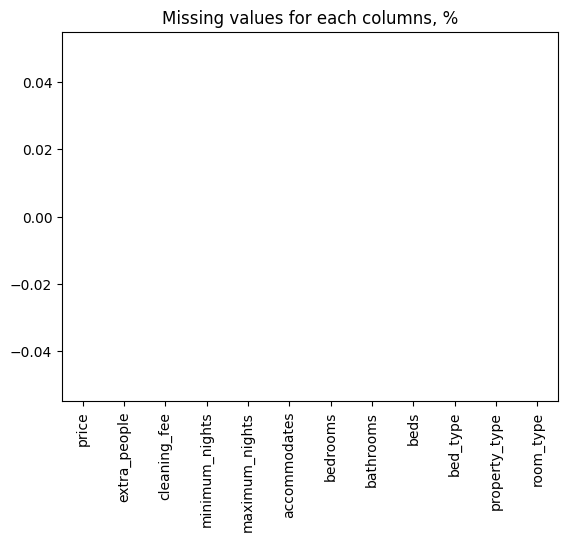

In [27]:
df_listings_missing = new_df_listing.isnull().mean() *100
df_listings_missing.plot(kind="bar")
plt.title("Missing values ​​for each columns, %")

# Part 3: Exploratory Data Analysis

array([[<Axes: title={'center': 'listing_id'}>,
        <Axes: title={'center': 'date'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'month'}>]], dtype=object)

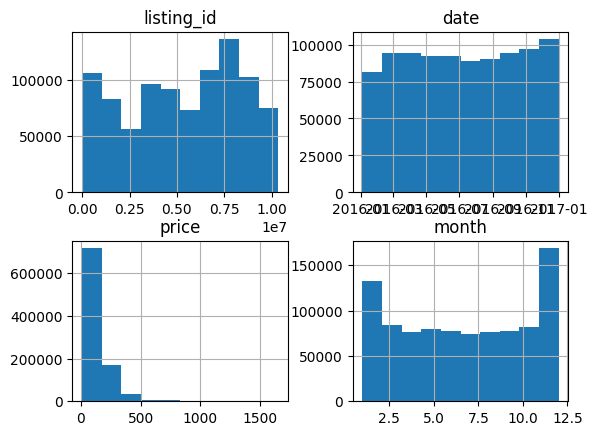

In [28]:
df_calendar_2016.hist()

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'extra_people'}>,
        <Axes: title={'center': 'cleaning_fee'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'maximum_nights'}>,
        <Axes: title={'center': 'accommodates'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'beds'}>]], dtype=object)

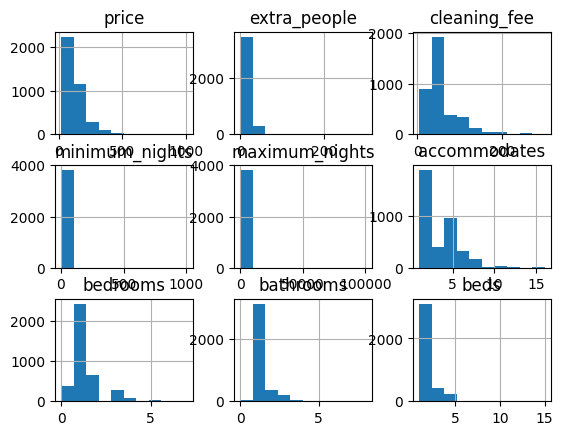

In [29]:
new_df_listing.hist()

<Axes: >

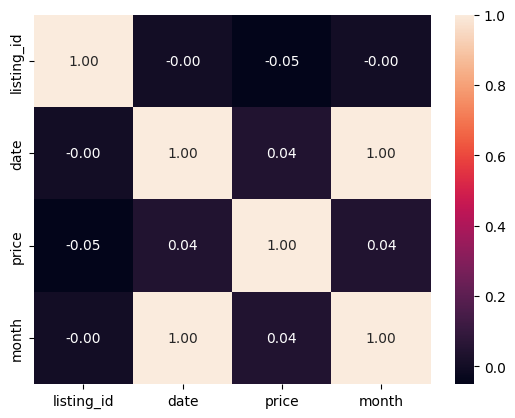

In [30]:
sns.heatmap(df_calendar_2016.corr(), annot=True, fmt='.2f')

In [31]:
new_df_listing_heatmap = new_df_listing[['price', 'extra_people', 'cleaning_fee', 'minimum_nights', 'maximum_nights', 'accommodates', 'bedrooms', 'bathrooms', 'beds']]

<Axes: >

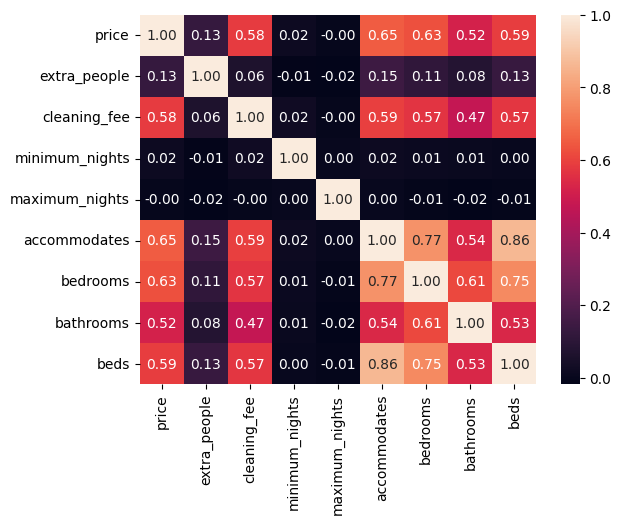

In [32]:
sns.heatmap(new_df_listing_heatmap.corr(), annot=True, fmt='.2f')

# Part 4: Data Preprocessing

In [33]:
# Perform one-hot encoding for multiple columns
new_df_listing_encoded = pd.get_dummies(new_df_listing, columns=['bed_type', 'property_type', 'room_type'], prefix=['bed_type', 'property_type', 'room_type'])

# Check the result after one-hot encoding
new_df_listing_encoded.head()


,price,extra_people,cleaning_fee,minimum_nights,maximum_nights,accommodates,bedrooms,bathrooms,beds,bed_type_Airbed,...,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,85.0,5.0,61.710904,1,365,4,1.0,1.0,1.0,False,...,False,False,False,False,False,False,False,True,False,False
1,150.0,0.0,40.000000,2,90,4,1.0,1.0,1.0,False,...,False,False,False,False,False,False,False,True,False,False
2,975.0,25.0,300.000000,4,30,11,5.0,4.5,7.0,False,...,True,False,False,False,False,False,False,True,False,False
3,100.0,0.0,61.710904,1,1125,3,0.0,1.0,2.0,False,...,False,False,False,False,False,False,False,True,False,False
4,450.0,15.0,125.000000,1,1125,6,3.0,2.0,3.0,False,...,True,False,False,False,False,False,False,True,False,False


In [34]:
print(new_df_listing_encoded.columns)

Index(['price', 'extra_people', 'cleaning_fee', 'minimum_nights',
       'maximum_nights', 'accommodates', 'bedrooms', 'bathrooms', 'beds',
       'bed_type_Airbed', 'bed_type_Couch', 'bed_type_Futon',
       'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'property_type_Apartment', 'property_type_Bed & Breakfast',
       'property_type_Boat', 'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Tent', 'property_type_Townhouse',
       'property_type_Treehouse', 'property_type_Yurt',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')


# Part 5: Data Modeling

### Fit model

In [35]:
X = new_df_listing_encoded.drop('price', axis=1)
y = new_df_listing_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

# Create pipeline with StandardScaler and LinearRegression
lm_model = make_pipeline(StandardScaler(), LinearRegression())
lm_model.fit(X_train, y_train)

# Prediction on test set
y_pred = lm_model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

R-squared: 0.5761
Mean Squared Error: 3314.1288


# Part 6: Evaluate the Results

### Q1: During which months or seasons is it generally cheapest to book a hotel room in Seattle on Airbnb?

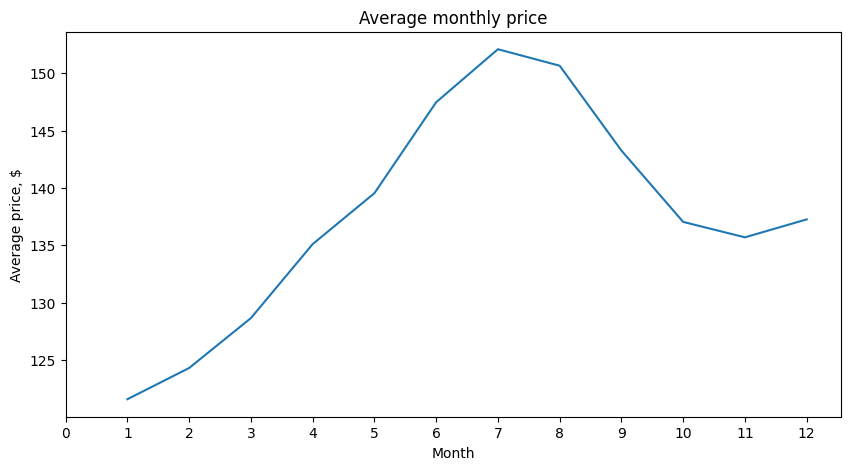

In [36]:
average_price_by_month = df_calendar_2016.groupby('month').mean()['price']

plt.figure(figsize=(10,5))
plt.plot(average_price_by_month)
plt.xticks(np.arange(0, 13, step=1))
plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average monthly price')

plt.savefig('Average monthly price.png')

plt.show()


Observations from the chart:
1. **Lowest room prices in winter and early year:** The average price starts lowest in January (~ $125), then gradually increases during the spring and summer months.

2. **Room prices peak in July and August:** The highest room prices are recorded around July and August (peak at ~ $155). This could be the peak tourist season in Seattle, causing prices to rise.

3. **Room prices drop significantly in autumn:** After peaking in July and August, prices decrease rapidly in September, October and continue to remain low until the end of the year.

Conclusion:
* **Room prices are typically cheapest at the beginning of the year (January, February) and end of the year (November, December).**
* **Room prices are highest in summer, especially in July and August**, possibly due to increased tourism demand during this period.

### Q2: What is the typical price range for hotel room listings on Airbnb in Seattle, and how does it vary by location within the city?

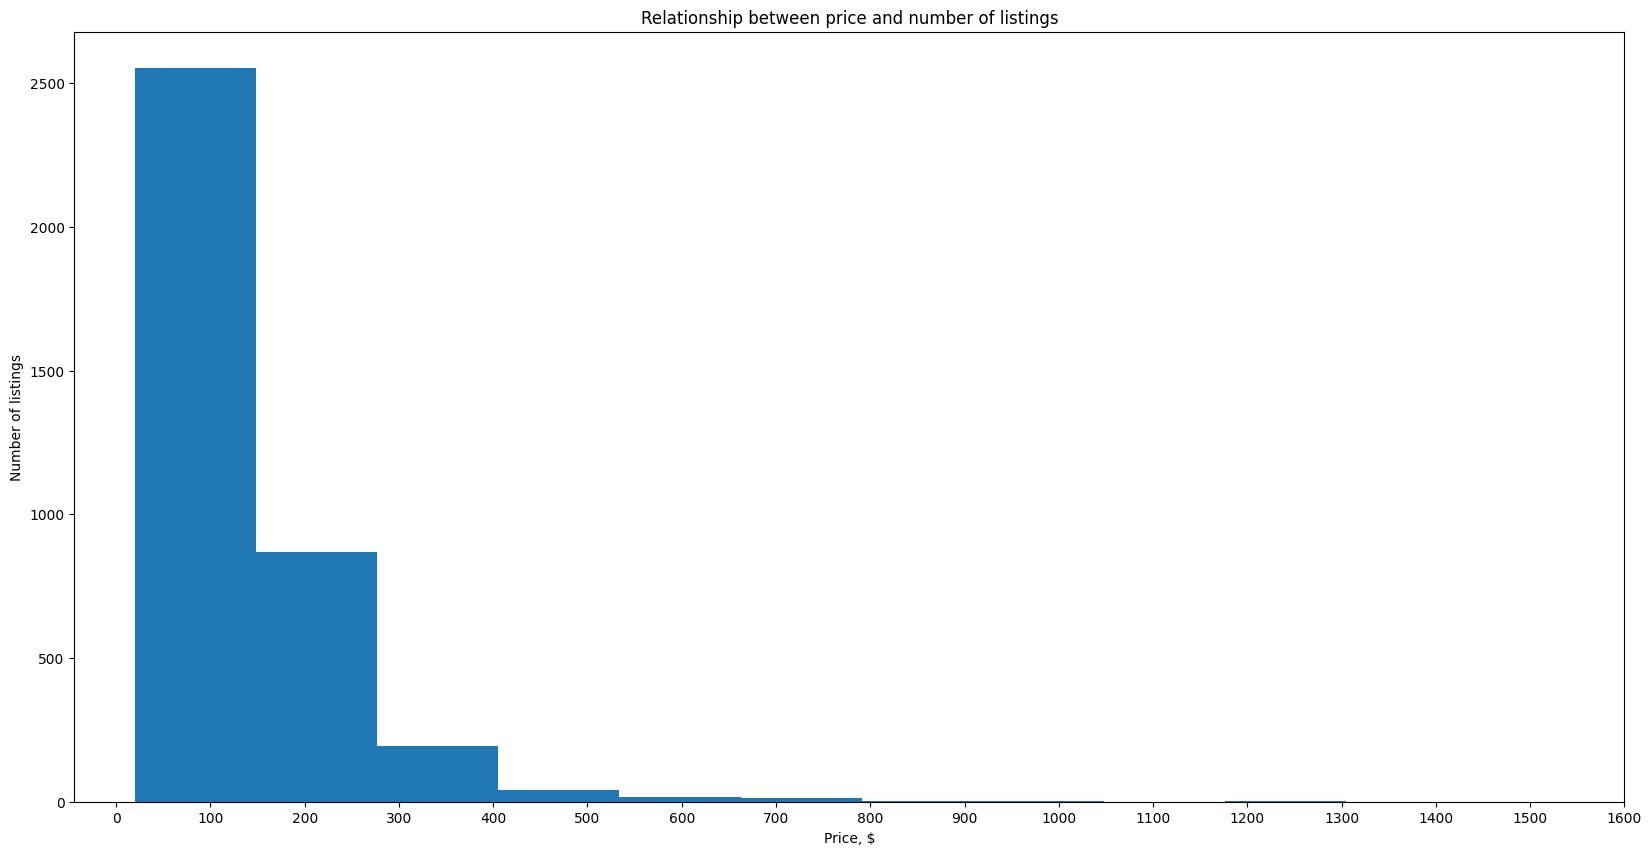

In [37]:
average_price_for_listings = df_calendar_2016.groupby('listing_id').mean()['price']

plt.figure(figsize=(20,10))
plt.hist(average_price_for_listings)
plt.xticks(np.arange(0, 1700, step=100))
plt.ylabel('Number of listings')
plt.xlabel('Price, $')
plt.title('Relationship between price and number of listings')

plt.savefig('Relationship between price and number of listings.png')

plt.show()

Here's the English translation of the comments on the chart:

Observations from the chart:
1. **Most rooms are priced below $400:** The chart shows that the majority of room listings are priced under $400, with the number of rooms concentrated mainly in the lower price range (from $0 to $300). The highest bar on the left indicates that there are many room listings with low prices (around under $200).

2. **Decreasing quantity as price increases:** As room prices increase from $300 and above, the number of listings decreases significantly. Very few listings have prices above $500, and there are almost no rooms priced over $1000.

Conclusion:
* **The common price range for Airbnb rooms in Seattle falls below $400.**
* **Very few rooms are priced higher than this**, and the number decreases sharply as the price increases, especially from $500 and above.

### Q3: What specific factors or amenities (such as room size, view, or proximity to attractions) tend to influence the price of hotel rooms on Airbnb in Seattle?

<Axes: >

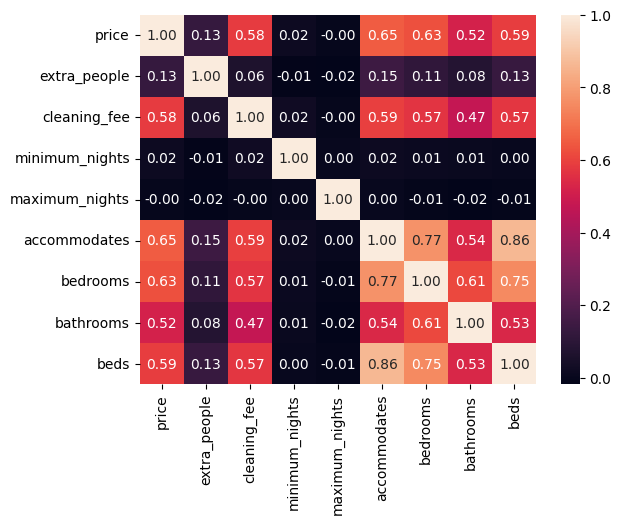

In [38]:
new_df_listing_encoded_10column_1 = new_df_listing_encoded[['price', 'extra_people', 'cleaning_fee', 'minimum_nights',
'maximum_nights', 'accommodates', 'bedrooms', 'bathrooms', 'beds']]
sns.heatmap(new_df_listing_encoded_10column_1.corr(), annot=True, fmt=".2f")

Observations on correlation with **price**:
1. **Cleaning_fee (0.58):** The cleaning fee has a fairly strong correlation with room price (0.58). This suggests that room listings with higher cleaning fees tend to have higher room prices.

2. **Accommodates (0.65):** The number of people a room can accommodate also has a strong correlation with room price (0.65). Rooms with higher capacity tend to be more expensive.

3. **Bedrooms (0.63):** The number of bedrooms has a strong correlation with room price (0.63), rooms with more bedrooms will have higher prices.

4. **Bathrooms (0.52):** The number of bathrooms has a moderate correlation with room price (0.52). Rooms with more bathrooms tend to be more expensive.

5. **Beds (0.59):** The number of beds also has a strong correlation with room price (0.59). This means that rooms with more beds usually have higher prices.

# Conclusion:
* Factors such as **cleaning fee, number of people accommodated, number of bedrooms, bathrooms, and beds** all have positive correlations with room price. Rooms with higher values in these amenities tend to have higher room prices.
* The factor **"extra_people"** has a low correlation (0.13) with room price, meaning that the additional charge for extra people doesn't significantly affect the main price of the room.

<Axes: >

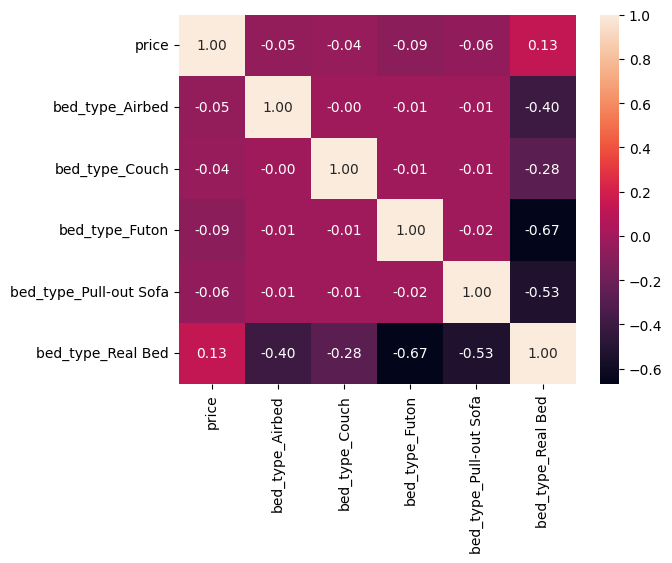

In [39]:
new_df_listing_encoded_10column_2 = new_df_listing_encoded[['price',
'bed_type_Airbed', 'bed_type_Couch', 'bed_type_Futon',
'bed_type_Pull-out Sofa', 'bed_type_Real Bed']]
sns.heatmap(new_df_listing_encoded_10column_2.corr(), annot=True, fmt=".2f")

Based on the correlation coefficients between bed types and room prices, we can make the following observations:

1. **bed_type_Airbed (-0.05):** Airbeds have a slight negative correlation with room price (-0.05). This means that rooms using airbeds tend to be slightly cheaper than those with other bed types, but the impact is not significant.

2. **bed_type_Couch (-0.04):** Couch beds also have a negative correlation (-0.04) with room price. Rooms using this type of bed tend to be cheaper, but the effect on price is very small.

3. **bed_type_Futon (-0.09):** Futon beds have the largest negative correlation (-0.09) compared to other bed types. This indicates that rooms using futons tend to have noticeably lower prices compared to other rooms.

4. **bed_type_Pull-out Sofa (-0.06):** Pull-out sofa beds also have a negative correlation (-0.06) with room price, showing that rooms using these beds usually have lower prices.

5. **bed_type_Real Bed (0.13):** Real beds have a positive correlation (0.13) with room price. This suggests that rooms using real beds tend to have higher prices compared to rooms using other types of beds. This difference may be due to real beds providing more comfort and being preferred by customers, thus driving prices up.

Conclusion:
* Bed types such as **Airbed**, **Couch**, **futon**, and **Pull-out Sofa** all tend to decrease room prices, but the impact is not very significant.
* **Real Beds** have a positive impact on room prices, indicating that rooms using real beds usually have higher prices than rooms using other types of beds, perhaps due to better quality and comfort.

<Axes: >

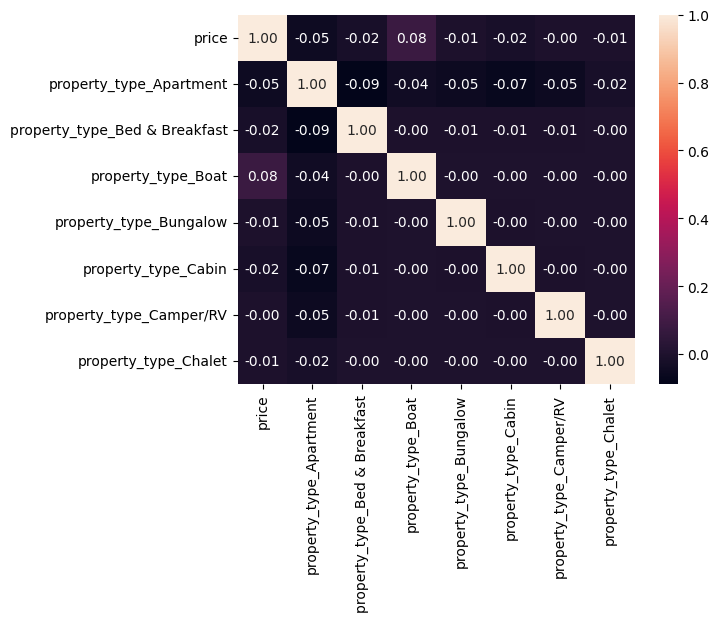

In [40]:
# property_type
new_df_listing_encoded_10column_2 = new_df_listing_encoded[['price',
'property_type_Apartment', 'property_type_Bed & Breakfast',
'property_type_Boat', 'property_type_Bungalow', 'property_type_Cabin',
'property_type_Camper/RV', 'property_type_Chalet']]
sns.heatmap(new_df_listing_encoded_10column_2.corr(), annot=True, fmt=".2f")

<Axes: >

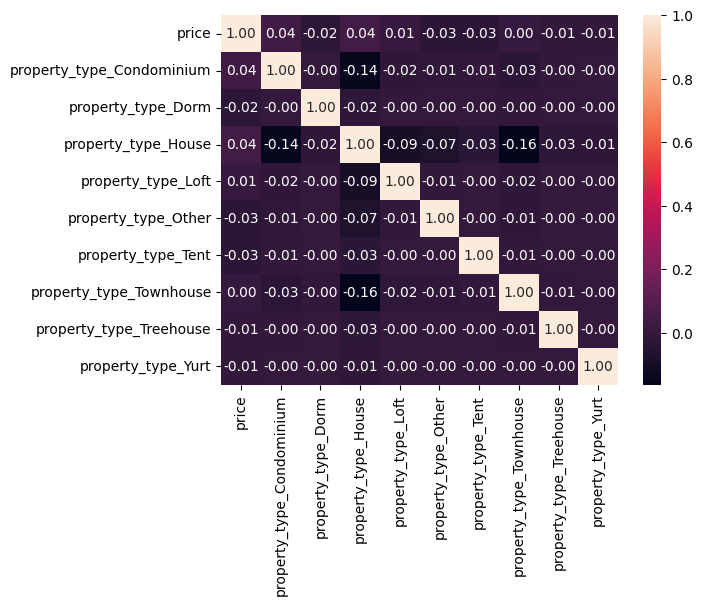

In [41]:
# property_type
new_df_listing_encoded_10column_2 = new_df_listing_encoded[['price',
'property_type_Condominium', 'property_type_Dorm',
'property_type_House', 'property_type_Loft', 'property_type_Other',
'property_type_Tent', 'property_type_Townhouse',
'property_type_Treehouse', 'property_type_Yurt']]
sns.heatmap(new_df_listing_encoded_10column_2.corr(), annot=True, fmt=".2f")


Based on the correlation coefficients between property types and room prices, we can make the following observations:

1. **property_type_Apartment (-0.05):** Apartments have a slight negative correlation with room price (-0.05). This suggests that apartment-type rooms tend to be slightly cheaper than other types, but the effect is not significant.

2. **property_type_Bed & Breakfast (-0.02):** Bed & Breakfast type has a very small negative correlation (-0.02) with room price. This type of room usually doesn't affect the price much.

3. **property_type_Boat (-0.08):** Boat type has the strongest negative correlation among the property types (-0.08), meaning that boat-type rooms tend to have noticeably lower prices compared to other types.

4. **property_type_Bungalow (-0.01), property_type_Cabin (-0.02), property_type_Chalet (-0.01), property_type_Loft (-0.01), property_type_Yurt (-0.01):** Bungalow, Cabin, Chalet, Loft, and Yurt types all have very small negative correlations with room price. This means they have little to no impact on price, or the impact is very slight.

5. **property_type_Camper/RV (-0.00) and property_type_Townhouse (-0.00):** Camper/RV and Townhouse types have almost no impact on room price, with correlation coefficients close to 0.

6. **property_type_Condominium (-0.04), property_type_House (-0.04):** Both Condominium and House types have slight negative correlations (-0.04) with room price, indicating that these types of rooms are slightly cheaper than average, but not significantly.

7. **property_type_Tent (-0.03) and property_type_Other (-0.03):** Both Tent and Other types have slight negative correlations (-0.03) with room price, meaning they tend to be slightly cheaper.

8. **property_type_Dorm (-0.021) and property_type_Treehouse (-0.01):** Both Dorm and Treehouse types have very small negative correlations with room price, showing that they also don't affect prices much.

Conclusion:
- The **Boat** property type has the strongest influence on decreasing room prices (-0.08).
- Other property types such as **Apartment**, **House**, and **Condominium** all have slight negative correlations with price, but the impact is not large.
- Types such as **Camper/RV**, **Townhouse**, and **Loft** don't affect room prices much, with correlation coefficients close to 0 or very small.

<Axes: >

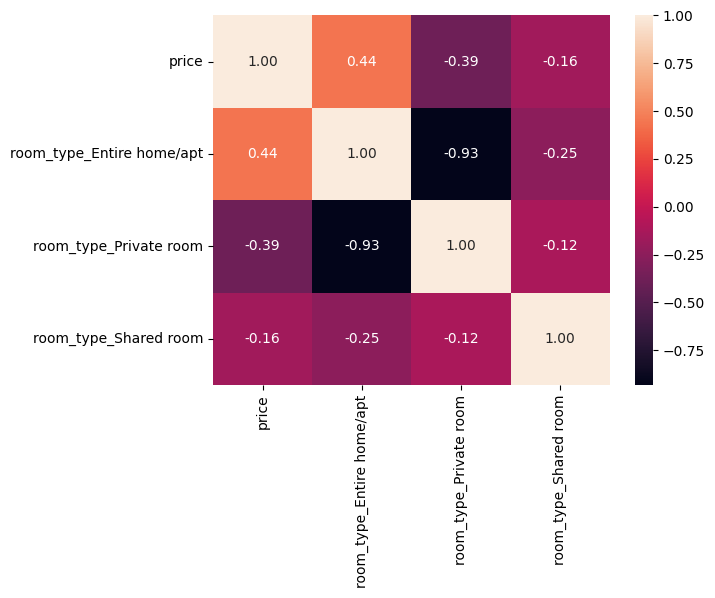

In [42]:
new_df_listing_encoded_10column_2 = new_df_listing_encoded[['price',
'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']]
sns.heatmap(new_df_listing_encoded_10column_2.corr(), annot=True, fmt=".2f")

Based on the correlation coefficients between room types and room prices, the following observations can be made:

1. **room_type_Entire home/apt (0.44):** Renting an entire home or apartment has a strong positive correlation (0.44) with room price. This indicates that when a room is of the **entire home or apartment** type, the price is usually significantly higher. This type of accommodation offers more privacy and space, leading to higher rental prices compared to other room types.

2. **room_type_Private room (-0.39):** Private rooms have a strong negative correlation (-0.39) with room price, meaning that when renting a private room, the price is usually significantly lower. Private rooms provide some privacy but don't offer exclusive use of common areas, so they are typically cheaper than renting an entire apartment/house.

3. **room_type_Shared room (-0.16):** Shared rooms have a negative correlation (-0.16) with room price, meaning that shared accommodations are usually priced lower than the other two types. However, the impact on price is not as strong as with **private rooms**, as shared rooms are typically very cheap but also offer limited amenities.

Conclusion:
- **Entire home/apartment** is the room type with the highest price, showing a strong positive correlation (0.44), reflecting the comfort and absolute privacy it offers.
- **Private rooms** are usually priced considerably lower than entire homes/apartments, with a strong negative correlation (-0.39).
- **Shared rooms** have the lowest price among the three room types, with a negative correlation (-0.16), but the impact on price is not as strong as with private rooms.
The room type is one of the crucial factors determining the price when renting on Airbnb.

# General conclusion:
* **Room type** and **bed type** are the factors that most strongly influence room price, especially when providing privacy or high-end amenities, which tend to increase the price.
* Room types that involve shared spaces (private rooms, shared rooms) and less comfortable bed types such as **Futon** and **Pull-out Sofa** tend to decrease rental prices.
* Some property types have a slight negative correlation with price, indicating that they don't play as significant a role in influencing prices compared to room and bed types.
The combination of amenities, privacy, and property type largely determines the room price on Airbnb.